_The following code requires having uploaded the dinov2 folder from our GitHub repository to your My Drive folder on Google Drive. There are further instructions below._

_Run the first 2 code blocks. After the second code block terminates, it will ask you to restart the session. Restart the session and then proceed to the next code block. You do not need to re-run the first two blocks after restarting the session._

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
!pip install -U openmim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.5/259.5 kB 6.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.7/89.7 kB 8.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 449.6/449.6 kB 15.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.7/52.7 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.5/311.5 kB 26.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.4/239.4 kB 21.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 506.5/506.5 kB 27.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.1/77.1 kB 7.2 MB/s eta 0:0

_The next two blocks require some time to run (1-3 minutes total). Run them, and while they are running, do the following:_

_First, upload the the current and previous image for which you want to visualize the NCUT embeddings to the /content directory. If you click on the Files tab to the left, you should be brought to the /content directory by default (you should see directories called .config and sample\_data). Keep in mind that since our method takes both the current and previous image as input, they must both be provided. For example, if you want to visualize features for image 2, your file system should look like /content/1.jpg, /content/2.jpg._

_Second, upload the desired model file to the /content directory. The model files are found within the models directory of our GitHub repository. We recommend taking the file corresponding to the model at the end of training. These models end in \_epoch\_9.pth._

In [1]:
!mim install mmcv==1.5.0
!pip install ncut_pytorch

Looking in links: https://download.openmmlab.com/mmcv/dist/cu121/torch2.5.0/index.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 530.7/530.7 kB 12.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.8/46.8 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 256.2/256.2 kB 20.5 MB/s eta 0:00:00
  Created wheel for mmcv: filename=mmcv-1.5.0-py2.py3-none-any.whl size=807180 sha256=785c163a33cdbac0efa0bb219d5246ca2cb10a5ff1c37676fe0bbf93a7b6aaed
  Stored in directory: /root/.cache/pip/wheels/86/b4/5d/1250f6319cd64acea208a8cd5a3e600506381c05bd65343d22
Successfully built mmcv
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 332.0/332.0 kB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 50.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 5.8 MB/s eta 0:00:00


In [2]:
import shutil

# Define the source and destination path
source_folder_path = '/content/gdrive/My Drive/dinov2'
destination_folder_path = '/content/dinov2'

# Copy the folder
shutil.copytree(source_folder_path, destination_folder_path)

'/content/dinov2'

_Run the next 2 blocks_

In [3]:
import os
from PIL import Image
import numpy as np
import torch
import torch.nn as nn
import torch.nn.init as init
import torch.nn.functional as F
import matplotlib
import matplotlib.pyplot as plt
from pathlib import Path
import sys
import math
import itertools
from functools import partial
import mmcv
from mmcv.runner import load_checkpoint
from collections import defaultdict
import cv2
import requests
from torchvision import transforms
from dinov2.eval.depth.models import build_depther
import urllib
import json
import random


class CenterPadding(torch.nn.Module):
    def __init__(self, multiple):
        super().__init__()
        self.multiple = multiple

    def _get_pad(self, size):
        new_size = math.ceil(size / self.multiple) * self.multiple
        pad_size = new_size - size
        pad_size_left = pad_size // 2
        pad_size_right = pad_size - pad_size_left
        return pad_size_left, pad_size_right

    @torch.inference_mode()
    def forward(self, x):
        pads = list(itertools.chain.from_iterable(self._get_pad(m) for m in x.shape[:1:-1]))
        output = F.pad(x, pads)
        return output


def create_depther(cfg, backbone_model, backbone_size, head_type):
    train_cfg = cfg.get("train_cfg")
    test_cfg = cfg.get("test_cfg")
    depther = build_depther(cfg.model, train_cfg=train_cfg, test_cfg=test_cfg)

    depther.backbone.forward = partial(
        backbone_model.get_intermediate_layers,
        n=cfg.model.backbone.out_indices,
        reshape=True,
        return_class_token=cfg.model.backbone.output_cls_token,
        norm=cfg.model.backbone.final_norm,
    )

    if hasattr(backbone_model, "patch_size"):
        depther.backbone.register_forward_pre_hook(lambda _, x: CenterPadding(backbone_model.patch_size)(x[0]))

    return depther


def make_depth_transform() -> transforms.Compose:
    return transforms.Compose([
        transforms.ToTensor(),
        lambda x: 255.0 * x[:3], # Discard alpha component and scale by 255
        transforms.Normalize(
            mean=(123.675, 116.28, 103.53),
            std=(58.395, 57.12, 57.375),
        ),
    ])


def render_depth(values, colormap_name="magma_r") -> Image:
    min_value, max_value = values.min(), values.max()
    normalized_values = (values - min_value) / (max_value - min_value)

    colormap = matplotlib.colormaps[colormap_name]
    colors = colormap(normalized_values, bytes=True) # ((1)xhxwx4)
    colors = colors[:, :, :3] # Discard alpha component
    return Image.fromarray(colors)


def load_config_from_url(url: str) -> str:
    with urllib.request.urlopen(url) as f:
        return f.read().decode()


def load_backbone(backbone_size = "small"):

    backbone_archs = {
        "small": "vits14",
        "base": "vitb14",
        "large": "vitl14",
        "giant": "vitg14",
    }
    backbone_arch = backbone_archs[backbone_size]
    backbone_name = f"dinov2_{backbone_arch}"

    backbone_model = torch.hub.load(repo_or_dir="facebookresearch/dinov2", model=backbone_name)
    backbone_model.eval()
    backbone_model.cuda()

    return backbone_name, backbone_model


def load_dino_model(backbone_name, backbone_model, backbone_size = "small", head_dataset = "nyu", head_type = "dpt"):

    DINOV2_BASE_URL = "https://dl.fbaipublicfiles.com/dinov2"
    head_config_url = f"{DINOV2_BASE_URL}/{backbone_name}/{backbone_name}_{head_dataset}_{head_type}_config.py"
    head_checkpoint_url = f"{DINOV2_BASE_URL}/{backbone_name}/{backbone_name}_{head_dataset}_{head_type}_head.pth"

    cfg_str = load_config_from_url(head_config_url)
    cfg = mmcv.Config.fromstring(cfg_str, file_format=".py")

    model = create_depther(
        cfg,
        backbone_model=backbone_model,
        backbone_size=backbone_size,
        head_type=head_type,
    )

    load_checkpoint(model, head_checkpoint_url, map_location="cpu")
    model.eval()
    model.cuda()

    return model


def enumerate_datasets(data_directory):

    datasets = []
    num_images_dataset = []

    for dataset_dir, _, files in os.walk(data_directory):
        if dataset_dir != data_directory:
            dataset_name = os.path.basename(dataset_dir)
            datasets.append(dataset_name)
            image_count = sum(1 for file in files if file.endswith('.jpg'))
            num_images_dataset.append(image_count)

    num_images = sum(num_images_dataset)

    return datasets, num_images_dataset, num_images


def load_training_logs(num_epochs, num_val_checkpoints, model_string):

    original_train_file_path = './training_logs/original_mse_train_' + model_string + '.pt'
    if os.path.exists(original_train_file_path):
        original_mse_train = torch.load(original_train_file_path, weights_only=True)
    else:
        original_mse_train = torch.zeros(num_epochs)

    updated_train_file_path = './training_logs/updated_mse_train_' + model_string + '.pt'
    if os.path.exists(updated_train_file_path):
        updated_mse_train = torch.load(updated_train_file_path, weights_only=True)
    else:
        updated_mse_train = torch.zeros(num_epochs)

    original_val_file_path = './training_logs/original_mse_val_' + model_string + '.pt'
    if os.path.exists(original_val_file_path):
        original_mse_val = torch.load(original_val_file_path, weights_only=True)
    else:
        original_mse_val = torch.zeros(num_epochs, num_val_checkpoints + 1)

    updated_val_file_path = './training_logs/updated_mse_val_' + model_string + '.pt'
    if os.path.exists(updated_val_file_path):
        updated_mse_val = torch.load(updated_val_file_path, weights_only=True)
    else:
        updated_mse_val = torch.zeros(num_epochs, num_val_checkpoints + 1)

    return original_mse_train, updated_mse_train, original_mse_val, updated_mse_val

In [4]:
class CNNModel(nn.Module):
    def __init__(self, num_layers, num_past_images):
        super(CNNModel, self).__init__()
        self.num_layers = num_layers
        self.num_past_images = num_past_images
        in_channels, out_channels = (384 + 2) * self.num_past_images, 384
        self.convlist = []
        for i in range(self.num_layers):
            self.convlist.append(nn.ModuleList([
                nn.Conv2d(in_channels=in_channels, out_channels=in_channels, kernel_size=3, padding=1)
                for _ in range(4)
            ]).cuda())
        self.conv_out = nn.ModuleList([
            nn.Conv2d(in_channels=in_channels, out_channels=out_channels, kernel_size=3, padding=1)
            for _ in range(4)
        ]).cuda()
        self.fclist = []
        for i in range(self.num_layers):
            self.fclist.append(nn.ModuleList([
                nn.Linear(in_channels, in_channels)
                for _ in range(4)
            ]).cuda())
        self.fc_out = nn.ModuleList([
            nn.Linear(in_channels, out_channels)
            for _ in range(4)
        ]).cuda()
        self._initialize_weights()

    def _initialize_weights(self):
        # Initialize convolutional layers
        for layer_idx in range(len(self.convlist)):
            for i, conv in enumerate(self.convlist[layer_idx]):
                with torch.no_grad():
                    init.constant_(conv.bias, 0)
                    conv.weight.zero_()

        for i, conv in enumerate(self.conv_out):
            with torch.no_grad():
                init.constant_(conv.bias, 0)
                conv.weight.zero_()

        # Initialize fully connected layers
        for layer_idx in range(len(self.fclist)):
            for i, fc in enumerate(self.fclist[layer_idx]):
                with torch.no_grad():
                    init.constant_(fc.bias, 0)
                    fc.weight.zero_()

        for i, fc in enumerate(self.fc_out):
            with torch.no_grad():
                init.constant_(fc.bias, 0)
                fc.weight.zero_()

    def forward_conv(self, x, idx):
        for layer_idx in range(len(self.convlist)):
            x_out = self.convlist[layer_idx][idx](x[:, 384:])
            x_out = torch.relu(x_out)
        x_out = self.conv_out[idx](x_out) + x[:, :384]
        return x_out

    def forward_fc(self, x, idx):
        for layer_idx in range(len(self.fclist)):
            x_out = self.fclist[layer_idx][idx](x[:, 384:])
            x_out = torch.relu(x_out)
        x_out = self.fc_out[idx](x_out) + x[:, :384]
        return x_out

    def forward(self, x, idx=0, mode="conv"):
        if mode == "conv":
            return self.forward_conv(x, idx)
        elif mode == "fc":
            return self.forward_fc(x, idx)
        else:
            raise ValueError(f"Invalid mode '{mode}', choose from ['conv', 'fc']")

_Set the model string variable to the desired model type you would like to test (either 'cnn' or 'cnn\_regularized'). Then you can run the following block, which will load the model._

In [5]:
backbone_size = "small" # in ("small", "base", "large", or "giant")
head_dataset = "nyu" # in ("nyu", "kitti")
head_type = "dpt" # in ("linear", "linear4", "dpt")

backbone_name, backbone_model = load_backbone(backbone_size=backbone_size)

model = load_dino_model(backbone_name, backbone_model, backbone_size=backbone_size, head_dataset=head_dataset, head_type=head_type)

model_string = 'cnn_regularized'

transform = make_depth_transform()

adapter_model = CNNModel(1, 1)
adapter_model.cuda()

epoch_to_load = 9
segment_to_load = None

if segment_to_load is None:
    adapter_model.load_state_dict(torch.load('./' + model_string + '_model_epoch_' + str(epoch_to_load) + '.pth', weights_only=True, map_location='cuda:0'))
else:
    adapter_model.load_state_dict(torch.load('./' + model_string + '_model_epoch_' + str(epoch_to_load) + '_segment_' + str(segment_to_load) + '.pth', weights_only=True, map_location='cuda:0'))

Downloading: "https://github.com/facebookresearch/dinov2/zipball/main" to /root/.cache/torch/hub/main.zip
/content/dinov2/layers/swiglu_ffn.py:51: UserWarning: xFormers is not available (SwiGLU)
  warnings.warn("xFormers is not available (SwiGLU)")
/content/dinov2/layers/attention.py:33: UserWarning: xFormers is not available (Attention)
  warnings.warn("xFormers is not available (Attention)")
/content/dinov2/layers/block.py:40: UserWarning: xFormers is not available (Block)
  warnings.warn("xFormers is not available (Block)")
Downloading: "https://dl.fbaipublicfiles.com/dinov2/dinov2_vits14/dinov2_vits14_pretrain.pth" to /root/.cache/torch/hub/checkpoints/dinov2_vits14_pretrain.pth
100%|██████████| 84.2M/84.2M [00:00<00:00, 93.2MB/s]
Downloading: "https://dl.fbaipublicfiles.com/dinov2/dinov2_vits14/dinov2_vits14_nyu_dpt_head.pth" to /root/.cache/torch/hub/checkpoints/dinov2_vits14_nyu_dpt_head.pth


load checkpoint from http path: https://dl.fbaipublicfiles.com/dinov2/dinov2_vits14/dinov2_vits14_nyu_dpt_head.pth


100%|██████████| 160M/160M [00:01<00:00, 114MB/s]


_Indicate the index of the image for which you would like to visualize the features. This must be at least 2, since the images begin at index 1, and we take both the previous and current image as input, so image 1 cannot be used as there is no image before it. For example, if you uploaded images 1.jpg and 2.jpg, you would specify image\_index = 2_

In [6]:
image_index = 2

_Run the following block to compute the features from the end of the DINO encoder, as well as the corresponding improved set of DINO features output by our adapter. This block also visualizes the original depth map (output by the vanilla DINOv2 pipeline) and the updated depth map (output by the pipeline in which our adapter modifies the DINO features)._

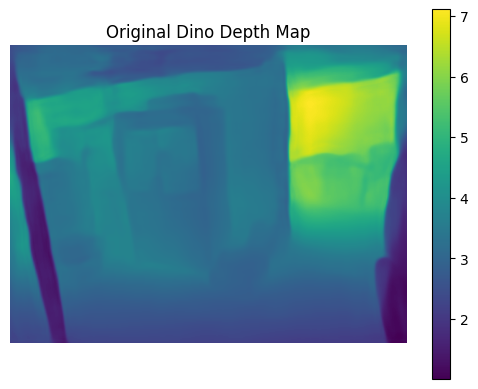

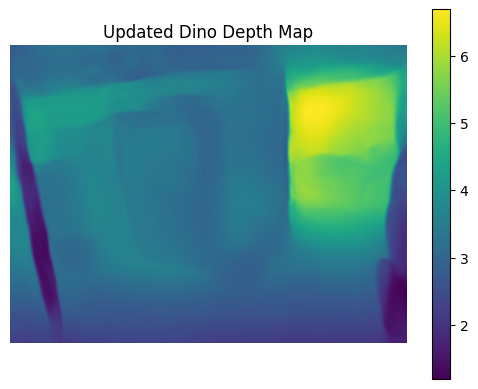

In [7]:
import numpy as np
import numpy as np
import torch
from torchvision import transforms

feature_height = 35
feature_width = 46
image_height = 480
image_width = 640

def feature_extractor(model, adapter_model):

    transform = make_depth_transform()

    transformed_image_current = transform(Image.open('/content/' + str(image_index) + '.jpg'))
    grayscale_image_current = cv2.imread('/content/' + str(image_index) + '.jpg', 0)

    with torch.no_grad():
        original_dino_depth_map = model.whole_inference(transformed_image_current.cuda().unsqueeze(0), img_meta=None, rescale=True).squeeze()

        dino_features_current = model.extract_feat(transformed_image_current.cuda().unsqueeze(0))

    transformed_image_previous = transform(Image.open('/content/' + str(image_index - 1) + '.jpg'))

    with torch.no_grad():
        dino_features_previous = model.extract_feat(transformed_image_previous.cuda().unsqueeze(0))

    grayscale_image_previous = cv2.imread('/content/' + str(image_index - 1) + '.jpg', 0)
    shift_x, shift_y = cv2.phaseCorrelate(np.float32(grayscale_image_previous), np.float32(grayscale_image_current))[0]

    shift_tensor_conv_x = shift_x * torch.ones(1, 1, feature_height, feature_width).cuda()
    shift_tensor_conv_y = shift_y * torch.ones(1, 1, feature_height, feature_width).cuda()
    shift_tensor_fc_x = shift_x * torch.ones(1, 1).cuda()
    shift_tensor_fc_y = shift_y * torch.ones(1, 1).cuda()

    dino_features_new = []
    for dpt_layer in range(4):
        adapter_input_image = torch.cat((dino_features_current[dpt_layer][0].detach().clone(), dino_features_previous[dpt_layer][0].detach().clone(), shift_tensor_conv_x, shift_tensor_conv_y), dim=1)
        adapter_input_fc = torch.cat((dino_features_current[dpt_layer][1].detach().clone(), dino_features_previous[dpt_layer][1].detach().clone(), shift_tensor_fc_x, shift_tensor_fc_y), dim=1)

        dino_features_new_x = []
        dino_features_new_x.append(adapter_model.forward_conv(adapter_input_image, dpt_layer))
        dino_features_new_x.append(adapter_model.forward_fc(adapter_input_fc, dpt_layer))
        dino_features_new.append(dino_features_new_x)

    updated_dino_depth_map = model._decode_head_forward_test(dino_features_new, img_metas=None)

    updated_dino_depth_map = torch.clamp(updated_dino_depth_map, min=model.decode_head.min_depth, max=model.decode_head.max_depth)

    updated_dino_depth_map = F.interpolate(updated_dino_depth_map, transformed_image_current.shape[1:], None, "bilinear", model.align_corners).squeeze()

    plt.imshow(original_dino_depth_map.detach().cpu().numpy(), cmap='viridis')
    plt.axis('off')
    plt.title("Original Dino Depth Map")
    plt.colorbar()
    plt.savefig('/content/original_dino_depth.png')
    plt.show()

    plt.imshow(updated_dino_depth_map.detach().cpu().numpy(), cmap='viridis')
    plt.axis('off')
    plt.title("Updated Dino Depth Map")
    plt.colorbar()
    plt.savefig('/content/updated_dino_depth.png')
    plt.show()

    del transformed_image_current
    del original_dino_depth_map, grayscale_image_current
    del shift_tensor_conv_x, shift_tensor_conv_y, shift_tensor_fc_x, shift_tensor_fc_y, shift_x, shift_y
    del transformed_image_previous, dino_features_previous, grayscale_image_previous
    del adapter_input_image, adapter_input_fc, updated_dino_depth_map
    torch.cuda.empty_cache()

    return dino_features_current[0][0].detach().cpu(), dino_features_new[0][0].detach().cpu()

original_features, updated_features = feature_extractor(model, adapter_model)
original_features = original_features.squeeze(0).permute(1, 2, 0).cpu()
updated_features = updated_features.squeeze(0).permute(1, 2, 0).cpu()

_Run this block to compute the eigenvectors and eigenvalues for the original set of DINO features._

In [8]:
from ncut_pytorch import NCUT

h, w, c = original_features.shape  # (32, 32, 768)
m = NCUT(num_eig=20)
original_eigenvectors, original_eigenvalues = m.fit_transform(original_features.flatten(0,1))

_Run this block to compute the eigenvectors and eigenvalues for the corresponding improved set of DINO features output by our adapter._

In [9]:
from ncut_pytorch import NCUT

h, w, c = updated_features.shape  # (32, 32, 768)
m = NCUT(num_eig=20)
updated_eigenvectors, updated_eigenvalues = m.fit_transform(updated_features.flatten(0,1))

_Run this block to visualize the eigenvectors and eigenvalues for the original set of DINO features._

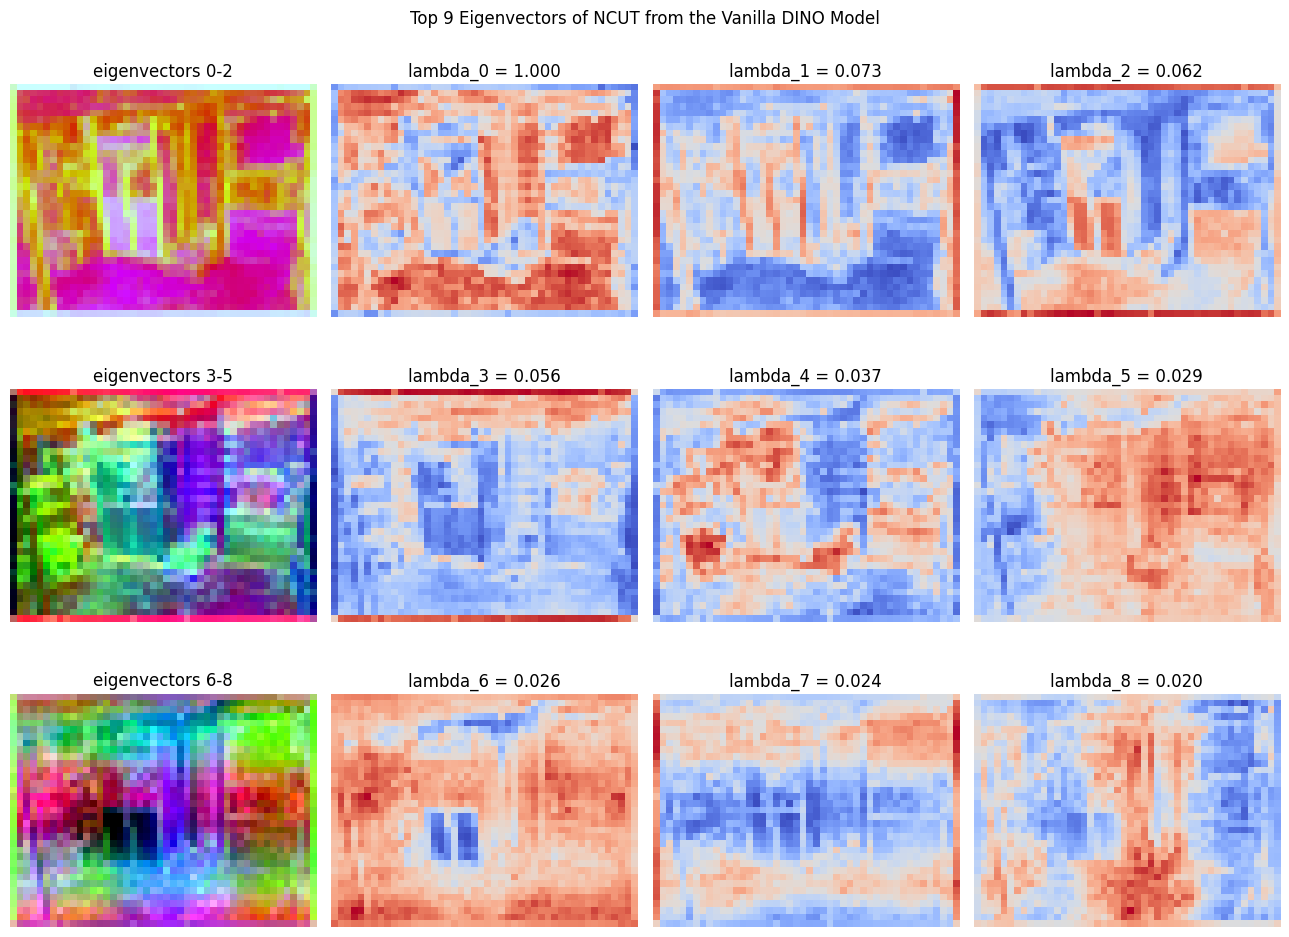

In [10]:
# visualize top 9 eigenvectors, 3 eigenvectors per row
import matplotlib.pyplot as plt
from ncut_pytorch import quantile_normalize
fig, axs = plt.subplots(3, 4, figsize=(13, 10))
i_eig = 0
# prod = original_eigenvalues * original_eigenvectors
for i_row in range(3):
    for i_col in range(1, 4):
        ax = axs[i_row, i_col]
        ax.imshow(original_eigenvectors[:, i_eig].reshape(h, w), cmap="coolwarm")
        ax.set_title(f"lambda_{i_eig} = {original_eigenvalues[i_eig]:.3f}")
        ax.axis("off")
        i_eig += 1
for i_row in range(3):
    ax = axs[i_row, 0]
    start, end = i_row * 3, (i_row + 1) * 3
    rgb = quantile_normalize(original_eigenvectors[:, start:end]).reshape(h, w, 3)
    ax.imshow(rgb)
    ax.set_title(f"eigenvectors {start}-{end-1}")
    ax.axis("off")
plt.suptitle("Top 9 Eigenvectors of NCUT from the Vanilla DINO Model")
plt.tight_layout()
plt.show()

_Run this block to visualize the eigenvectors and eigenvalues for the corresponding improved set of DINO features output by our adapter._

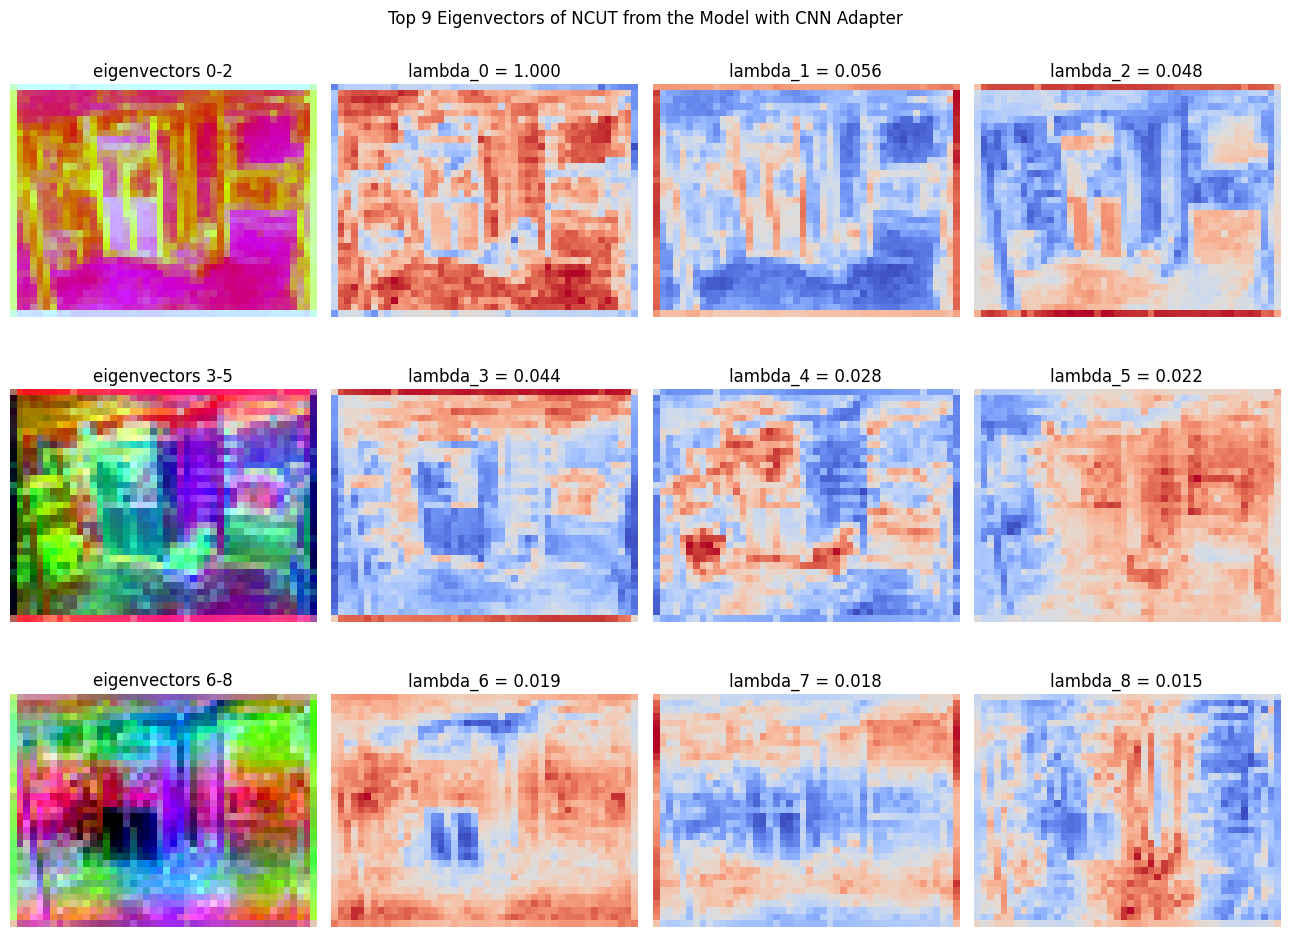

In [11]:
# visualize top 9 eigenvectors, 3 eigenvectors per row
import matplotlib.pyplot as plt
from ncut_pytorch import quantile_normalize
fig, axs = plt.subplots(3, 4, figsize=(13, 10))
# prod = updated_eigenvectors*updated_eigenvalues
i_eig = 0
for i_row in range(3):
    for i_col in range(1, 4):
        ax = axs[i_row, i_col]
        ax.imshow(updated_eigenvectors[:, i_eig].reshape(h, w), cmap="coolwarm")
        ax.set_title(f"lambda_{i_eig} = {updated_eigenvalues[i_eig]:.3f}")
        ax.axis("off")
        i_eig += 1
for i_row in range(3):
    ax = axs[i_row, 0]
    start, end = i_row * 3, (i_row + 1) * 3
    rgb = quantile_normalize(updated_eigenvectors[:, start:end]).reshape(h, w, 3)
    # rgb = updated_eigenvectors[:, start:end].reshape(h, w, 3)
    ax.imshow(rgb)
    ax.set_title(f"eigenvectors {start}-{end-1}")
    ax.axis("off")
plt.suptitle("Top 9 Eigenvectors of NCUT from the Model with CNN Adapter")
plt.tight_layout()
plt.show()